# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="Dataset/Images/pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="Dataset/Images/pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="Dataset/Images/pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="Dataset/Images/pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="Dataset/Images/pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 


<img src="Dataset/Images/k-means.png" alt="Pizza-1" style="width: 600px;"/>


### Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

### Dataset Preparation

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

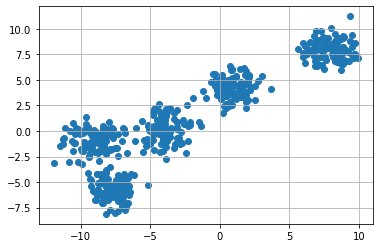

In [3]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
# Step 1. Initializing K Cluster Centers
k = 5
color = ["green", "red", "blue", "yellow", "brown"]

clusters = {}

for i in range(k):
    center = 10 * (2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster

In [5]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [6]:
def assignPointToClusters(clusters): # E-Step
    """ Step 2. Initial Assignment Of Every Point To The Nearest Cluster Center """
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)

In [7]:
def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        # Plot The Points
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[kx]['color'])
        except:
            pass
        
        # Plot The Cluster Center
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color="black", marker="*")
    plt.grid(True)
    plt.show()

In [8]:
def updateClusters(clusters): # M-Step
    """ Step 3. Update Every Cluster Center According To The Mean Of The Points In It. """
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        # If a Cluster Has Some Non-Zero Points
        if(pts.shape[0] > 0):
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            # Clear The List of Points After Updating The Cluster Center
            clusters[kx]['points'] = []

Iteration Number :  0


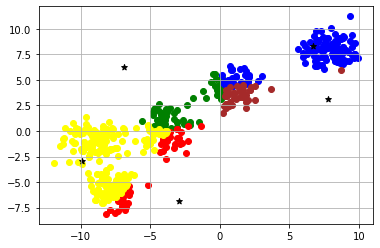

Iteration Number :  1


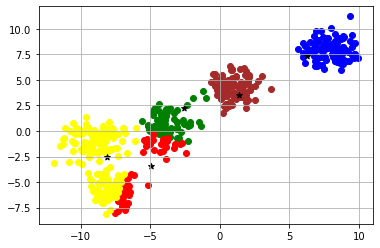

Iteration Number :  2


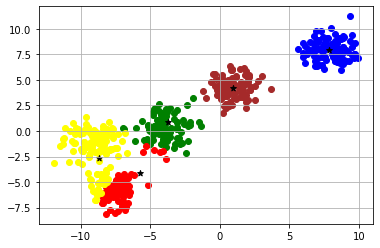

Iteration Number :  3


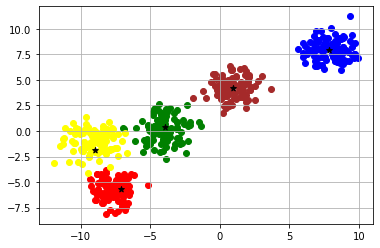

Iteration Number :  4


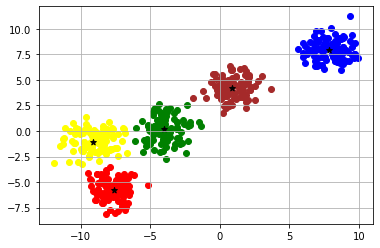

Iteration Number :  5


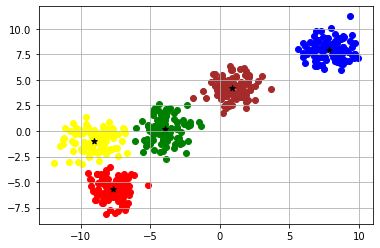

Iteration Number :  6


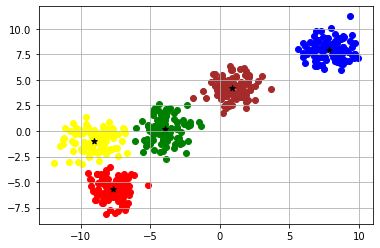

Iteration Number :  7


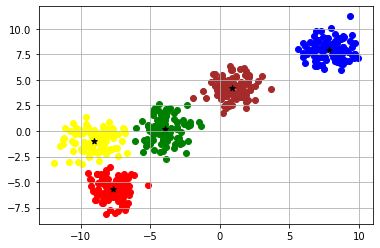

Iteration Number :  8


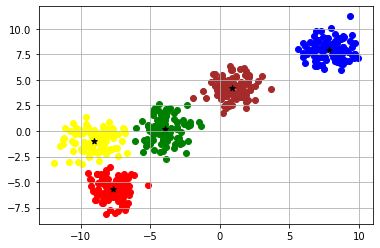

Iteration Number :  9


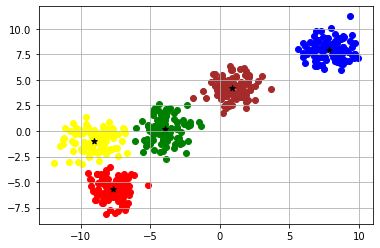

In [9]:
num_itr = 10
while(num_itr):
    assignPointToClusters(clusters)
    print("Iteration Number : ", 10 - num_itr)
    plotClusters(clusters)
    updateClusters(clusters)
    num_itr-=1